In [1]:
import matplotlib.pyplot as plt
import random
import time
import numpy as np
from IPython.display import clear_output

### Classe Graphe avec tous les algorithmes de plus court chemin ###

In [2]:
class L_graph:
    def __init__(self,graphe, initNum = 0):
        self.initNum = initNum # 0 si les numeros des noeuds du graphe commencent par zero et 1 s'ls commencent par 1
        self.graphListAdj = graphe
        self.n = len(self.graphListAdj)
      
    def listAdj(self,sommet):
        return self.graphListAdj[sommet]

    def trouve_min(self,M,ppdistance):
        sommet = M[0]
        mini = ppdistance[sommet]
        for s in M:
            if ppdistance[s] < mini :
                mini = ppdistance[s]
                sommet = s
        return sommet

    def maj_distances(self, sommet1, sommet2, ppdistance, pred):
        # dans notre cas, tous les poids seront 1, d'ou la modification à la ligne suivante
        #poid = poids[sommet1][sommet2] if poids else 1 
        poid = 1
        if ppdistance[sommet2] > (ppdistance[sommet1] + poid):
            ppdistance[sommet2] = ppdistance[sommet1] + poid
            pred[sommet2] = sommet1

    def buildPath(self, pred, noeudInitial, noeudFinal):
        path = [noeudFinal]
        while(noeudFinal != noeudInitial):
            noeudFinal = pred[noeudFinal]
            path.insert(0,noeudFinal)
        return path

    def djikstra(self,noeudInitial, noeudFinal = None):
        #Initialisation
        if self.initNum == 1:
            pred = list(range(0,self.n+self.initNum))
        else:
            pred = list(range(0, self.n))
        ppdistance = [float('inf')]*(self.n+self.initNum)
        ppdistance[noeudInitial] = 0
        M=list(range(self.initNum,self.n+self.initNum))

        while (M!=[]):
            noeudCourrant = self.trouve_min(M,ppdistance)
            M.remove(noeudCourrant)
            for voisin in self.listAdj(noeudCourrant):
                self.maj_distances(noeudCourrant, voisin,ppdistance, pred)

        if noeudFinal:
            return self.buildPath(pred, noeudInitial, noeudFinal)
        else:
            return [ppdistance,pred]
 

### Initialisation et redimensionnement du tableau ####

*maze map = carte du labyrinthe*

Ce tableau contient les différentes couleurs du labyrinthe.
Il est dénommé **maze_map** pour plus de clarté. 

#### 1.1 Initialisation du tableau ####

#### 1.2 Méthodes de génération de la liste d'adjacence à partir de *maze_map* #####

\\\ **1ère étape** : Parcours du tableau maze_map à la recherche de tous les blocks qui sont des chemins(**roads**)


\\\ **2ème étape** : Trouver les roadblocks(chemin praticable ou **road**) et générer la liste d'adjacence


In [3]:
nature_dict = {'sidewalk': [0.8], 'road':[1] }

# Addition de deux tuples
def tuple_addition(tuple1, tuple2):
        result = tuple(x + y for x, y in zip(tuple1, tuple2))
        return result

class Map:
    
    current_cols = 10     # Nombre de colonnes
    current_rows =10      #Nombre de lignes
    maze_map =  [[0 for _ in range(10)] for _ in range(10)]    # Cartographie du labyrinthe avec aussi les positions des agents
    
    all_maps = {}
    all_maps_reverse = {}
    
    
    def __init__(self, nature:str):
        self.nature = nature
        self.nature_index = []    # Valeur par laquelle on reconnaît le block de même nature sur maze_map
        
        self.roadblocks = []     # Tableau contenant tous les blocks de maze_map qui sont des roads(chemins praticables) 
        self.roadblocks2 = {}     # Set pour la recherche plus rapide 
        self.adjacency_list = {}     # Liste d'adjacence par rapport au milieu
        
        self.define_nature_spectrum()
        Map.all_maps[self] = self.nature    #Ajout dans le set 'all_maps'
        Map.all_maps_reverse[self.nature] = self    #Ajout dans le set 'all_maps'
    
    def define_nature_spectrum(self):
        self.nature_index = nature_dict[self.nature]
        

    def check(self,block, neighbor):
        block = self.roadblocks2[block]
    
        if neighbor in self.roadblocks:
            neighbor = self.roadblocks2[neighbor]
            if self.adjacency_list.get(block) is None:
                self.adjacency_list[block] = {neighbor}
            else:
                self.adjacency_list[block].add(neighbor)
            
            if self.adjacency_list.get(neighbor) is None:
                self.adjacency_list[neighbor] = {block}
            else:
                 self.adjacency_list[neighbor].add(block)

 
    def find_neighboring_roadblocks(self,block):
        #Left-Top block
        lt = tuple_addition(block , (-1,1))
        self.check(block, lt)
            
        #Top block
        t = tuple_addition(block , (0,1))
        self.check(block, t)
            
        #Right-Top block
        rt = tuple_addition(block , (1,1))
        self.check(block, rt)
            
        #Left block
        l = tuple_addition(block , (-1,0))
        self.check(block, l)
            
        #Right block
        r = tuple_addition(block , (1,0))
        self.check(block, r)
            
        #Left-Down block
        ld = tuple_addition(block , (-1,-1))
        self.check(block, ld)
    
        #Down block
        d = tuple_addition(block , (0,-1))
        self.check(block, d)
            
        #Rigth-Top block
        rd = tuple_addition(block , (1,-1))
        self.check(block, rd)
        
    
    def generate_adjacency_list(self):
        # new_map est l'objet de la classe Map dans lequel toutes les informations relatives au 
        #chemin que peut empreinter tous les agents de même nature
    
        self.adjacency_list.clear()
        self.roadblocks2.clear()
    
        #Première étape
    
        i, j, k = 0, 0, 0
        for i in range(Map.current_rows):
            j= 0
            for j in range(Map.current_cols):
                if Map.maze_map[i][j] in self.nature_index: # Vérifie la valeur entière représentant un chemin praticable
                    tmp = (j,i)
                    self.roadblocks.append(tmp) #Ajout des coordonées du road_block dans le tableau roadblocks[]  || j => X-Axis  &  i => Y-Axis
                    self.roadblocks2[tmp] = k
                    k = k+1
    
        #Deuxième étape
    
        for roadblock in self.roadblocks:
            self.find_neighboring_roadblocks(roadblock)

#### 2. Redimensionnement du tableau ####

In [4]:
def resize_table(new_rows, new_cols):
    current_rows = len(Map.maze_map)
    current_cols = len(Map.maze_map[0])
    
    # Ajouter des lignes si la nouvelle taille est supérieur à la taille actuelle
    if new_rows > current_rows:
        for _ in range(new_rows - current_rows):
            Map.maze_map.append([0 for _ in range(current_cols)])

    # Enlever des lignes si la nouvelle taille est supérieur à la taille actuelle
    elif new_rows < current_rows:
        Map.maze_map = Map.maze_map[:new_rows]

    # Ajouter des colonnes si la nouvelle taille est supérieur à la taille actuelle
    if new_cols > current_cols:
        for row in Map.maze_map:
            row.extend([0 for _ in range(new_cols - current_cols)])

    # Enlever des colonnes si la nouvelle taille est supérieur à la taille actuelle
    elif new_cols < current_cols:
        for row in Map.maze_map:
            row = row[:new_cols]
            
    # Mise à jour des variables 'current_rows' et 'current_cols' dans la classe Map
    Map.current_rows = new_rows
    Map.current_cols = new_cols

  ### Couleurs des dalles ###

In [5]:
off_road = 0.35
sidewalk = 0.8
road = 1
initial_position = [0,0]

### Lecture du fichier contenant la modélisation du chemin ###

In [6]:
def execute_once(any_boolean):
    if any_boolean == False:
        any_boolean = True
    return any_boolean
    
def lecture_fichier_csv():
    instruction_executed = False
    # Chemin du fichier CSV
    file_path = "C:/Users/hp/Downloads/Chemin2.csv"  # ATTENTION : CE CHEMIN INDIQUE L'EMPLACEMENT DU FICHIER CSV.
    
    # Ouverture du fichier en mode lecture
    with open(file_path, 'r') as file:
        #Lecture des lignes du fichier
        lines = file.readlines()
        
        # Enregisrement des dimensions de l'axe Y
        yAxis = len(lines)
        
        # La lecture des lignes se fait du bas vers le haut
        i = len(lines)-1
        j = 0
        
        # Parcours de chaque ligne
        for line in lines:
            # Divise chaque ligne en valeurs individuelles
            values = line.strip().split(',')
            
            if not instruction_executed:
                # Enregisrement des dimensions de l'axe X
                xAxis = len(values)
                resize_table(yAxis,xAxis)
                instruction_executed = execute_once(instruction_executed)
            
            
            # Réinitialisation de l'index j à chaque passage sur une nouvelle ligne
            j = 0
            
            # Accès à chacune des valeurs et remplissage du maze_map (Tableau représentant le chemin du labyrinthe)
            for value in values:
                    if value == '':
                        Map.maze_map[i][j] = off_road
                    else:
                        Map.maze_map[i][j] = 1 if int(value) == 1 else 0.8
                        #Map.maze_map[i][j] = road
                    j = j+ 1
            i = i- 1
        file.close()

### Génération de la liste d'adjacence à partir de *maze_map* pour tous les maps ###

In [7]:
def generate_all_adjacency_list():
    Map.all_maps.clear()
    for nature_type in nature_dict:
        new_map = Map(nature_type)
    for map_object in (Map.all_maps):
        if(map_object.adjacency_list is not None):
            map_object.generate_adjacency_list()

### Affichage du labyrinthe ###

In [8]:
def plotting(new_updates):
    clear_output(wait = True) # Efface la figure précédente
        
    # Graduation des axes
    x = np.arange(0, Map.current_cols, 1)  
    y = np.arange(0, Map.current_rows, 1)
        

    fig, ax = plt.subplots()
    maze_map = Map.maze_map
    
    a, b = new_updates["pedestrian"]
    c, d = new_updates["car"]
    
    ax.plot(a, b, marker='o', markersize=10, color='red')
    ax.plot(c, d, marker='D', markersize=10, color='blue')
    
    ax.pcolormesh(x, y, maze_map)
    plt.show()
        

### Création de la classe "Agent" ###

In [9]:
def generating_path_djikstra(map_object,noeud_initial, noeud_final):
    #appel du graphe
    graph = L_graph(map_object.adjacency_list)
    poids = None
    return graph.djikstra(noeud_initial, noeud_final)
    #implique qu'il faudra initialiser le graphe en tant que 'graph' avant d'appeler cette fonction
    
class Agent:
    
    # 'all_agents' tableau contenant les différents agents en tant qu'objets
    all_agents = []
    longest_path = 0
    def __init__(self, nature:str, current_position, destination = None):
        assert (nature == 'pedestrian' or nature == 'car'), f"{nature} n'est pas compatible comme Agent"
        self. nature = nature
        self.current_position = current_position
        self.previous_position = current_position
        self.destination = destination
        self.path = None
        self.path2 = None
       
        
        # Chaque fois qu'un nouvel agent est créé, il est stocké dans la liste 'all_agents'
        Agent.all_agents.append(self)
        
    def get_longest_path_size(self):
        if len(self.path2) > Agent.longest_path :
            Agent.longest_path = len(self.path2)
            
    #Fonction qui va générer des path pour tous les agents
    def generate_path(self, map_object):
        self.path = generating_path_djikstra(map_object,map_object.roadblocks2[self.current_position], map_object.roadblocks2[self.destination])
        self.path2 = []
        
        for cell in self.path:
            self.path2.append(map_object.roadblocks[cell])
            
        self.get_longest_path_size()

### Création des chemins pour chaque 'Agent' ###

In [10]:
#Fonction qui va générer des path pour tous les agents

def generate_paths():
    for agent in Agent.all_agents:
        #on crée un chemin avec l'algo de djikstra pour chaque agent qu'on va lui assigner

        if agent.nature == "pedestrian":
                mapping = Map.all_maps_reverse["sidewalk"]
        elif agent.nature == "car":
                mapping = Map.all_maps_reverse["road"]
        else:
                print("No match was found")
                
        agent.generate_path(mapping)

### Mise à jour de la position des agents ###

In [11]:
def update_agent_position():
    agents_path = {}
    updates = {}
    
    for agent in Agent.all_agents:
        agents_path[agent] = agent.path2
        
    j = 0
    for j in range (Agent.longest_path):
        updates.clear()
        for agent in agents_path:
            if j < len(agent.path2):
                updates[agent.nature] = agent.path2[j]
                agent.current_position = agent.path2[j]
            else:
                updates[agent.nature] = agent.current_position
        plotting(updates)
        time.sleep(0.5)
        j = j +1         

# Execution du programme #

In [12]:
lecture_fichier_csv()
generate_all_adjacency_list()

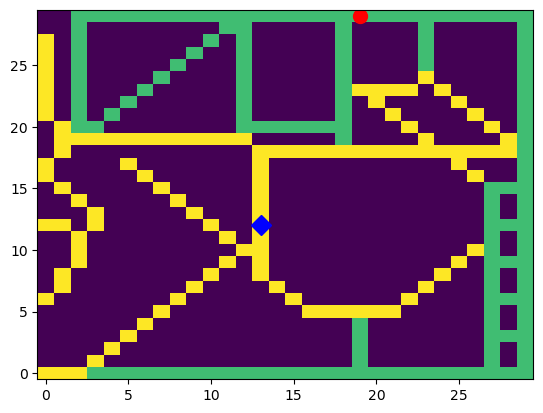

In [ ]:
#Tested values
# Bob :(0,0),(28,19) ,,, Ferrari: (0,0), (0,6)
# Bob :(19,5), (28,19) ,,, Ferrari: (26,10), (0,6)
#Bob est un piéton et Ferrari est une voiture
Bob = Agent("pedestrian", (2,20), (4,0) )
Ferrari = Agent("car", (26,10), (0,6) )
generate_paths()
update_agent_position()

Les blocks **jaunes** représentent la voie automobile.

Les blocks **verts** représentent la voie pour les piétons.

Le diamond bleu représentent la voiture(Ferrari)

Le cercle rouge représentent la voie pour un piéton(Bob)